In [1]:
pip install jieba pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'san

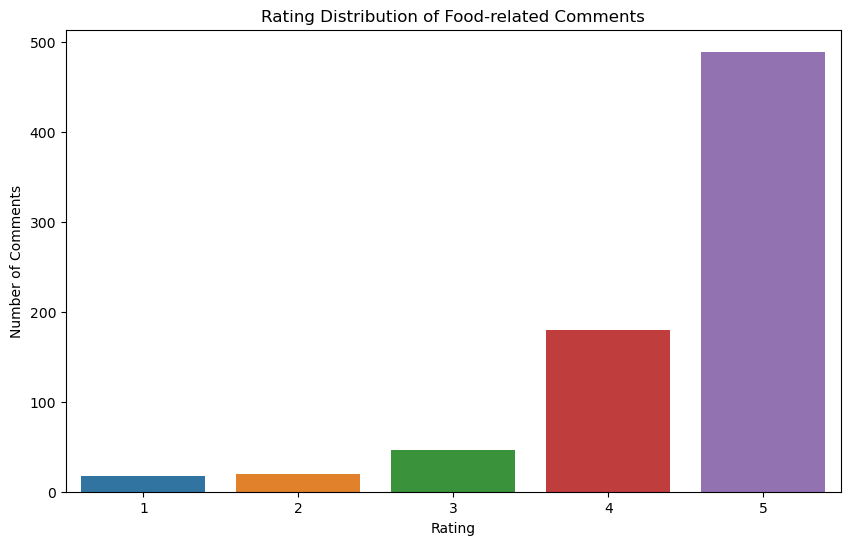

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the fo

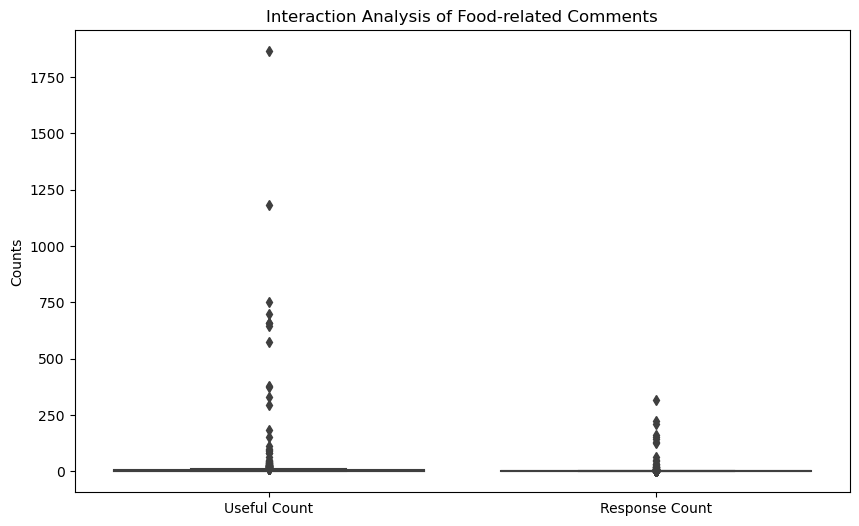

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'san

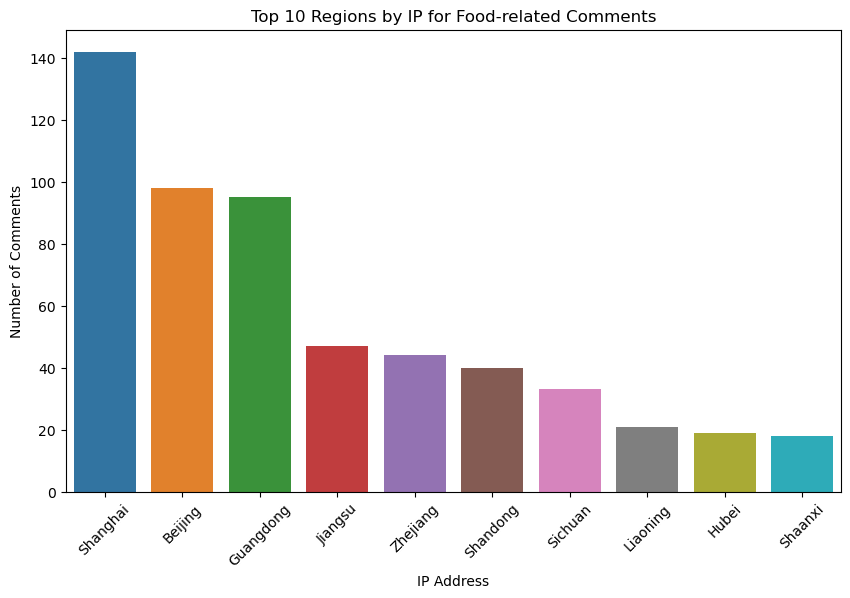

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

Percentage of 5-star ratings in food-related comments: 64.94%
Percentage of 5-star ratings in overall comments: 62.11%


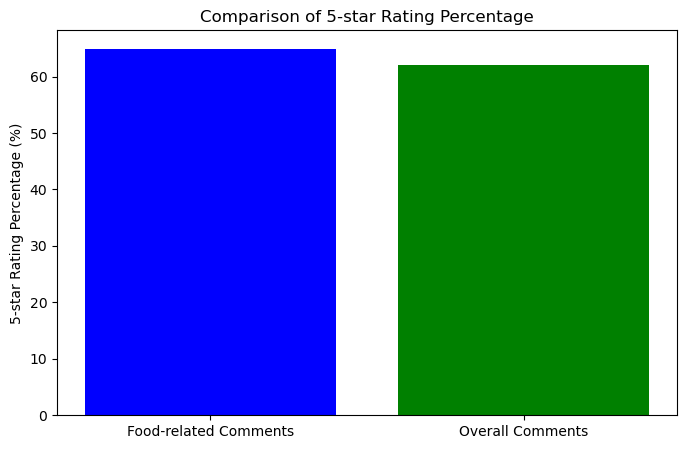

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取Excel文件
file_path = 'Blossoms_DouBan_Review.xlsx'
df = pd.read_excel(file_path)

# 定义电视剧中提及的美食关键词库
drama_food_keywords = ['和平饭店', '至真园', '泡饭', '排骨年糕', '青鱼秃肺拼海参', '红烧划水', '定胜糕', '油墩', 
                        '川沙鸡爪', '牛河', '黄鱼面', '粢饭团', '仙鹤神针', '船王炒饭', '火焰大王蛇', 
                        '三文鱼', '鲇鱼', '茶叶蛋', '火锅', '辣肉面', '宝总套餐']

# 只保留包含美食关键词的评论
df['food_related'] = df['内容'].apply(lambda x: any(kw in str(x) for kw in drama_food_keywords))
food_related_comments = df[df['food_related']]

# 分析1: 美食相关评论与星级的关系
plt.figure(figsize=(10, 6))
sns.countplot(data=food_related_comments, x='星级')
plt.title('Rating Distribution of Food-related Comments')
plt.xlabel('Rating')
plt.ylabel('Number of Comments')
plt.show()

# 分析2: 美食相关评论的互动性分析（有用数、回应数）
# 替换列名为英文
food_related_comments = food_related_comments.rename(columns={'有用数': 'Useful Count', '回应数': 'Response Count'})

plt.figure(figsize=(10, 6))
sns.boxplot(data=food_related_comments[['Useful Count', 'Response Count']])
plt.title('Interaction Analysis of Food-related Comments')
plt.ylabel('Counts')
plt.show()

# 分析3: 美食相关评论的地域分布
ip_counts = food_related_comments['IP'].value_counts().head(10)

# 翻译IP地址
from deep_translator import GoogleTranslator
translator = GoogleTranslator(source='zh-CN', target='en')
ip_counts.index = [translator.translate(ip) for ip in ip_counts.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=ip_counts.index, y=ip_counts.values)
plt.title('Top 10 Regions by IP for Food-related Comments')
plt.xlabel('IP Address')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

# 分析4: 美食相关评论中五星评价的比例
food_related_five_star = food_related_comments[food_related_comments['星级'] == 5]
overall_five_star = df[df['星级'] == 5]

food_five_star_rate = len(food_related_five_star) / len(food_related_comments) * 100
overall_five_star_rate = len(overall_five_star) / len(df) * 100

print(f'Percentage of 5-star ratings in food-related comments: {food_five_star_rate:.2f}%')
print(f'Percentage of 5-star ratings in overall comments: {overall_five_star_rate:.2f}%')

# 可视化对比: 美食相关评论与整体评论的五星评价比例对比
plt.figure(figsize=(8, 5))
plt.bar(['Food-related Comments', 'Overall Comments'], [food_five_star_rate, overall_five_star_rate], color=['blue', 'green'])
plt.title('Comparison of 5-star Rating Percentage')
plt.ylabel('5-star Rating Percentage (%)')
plt.show()


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'san

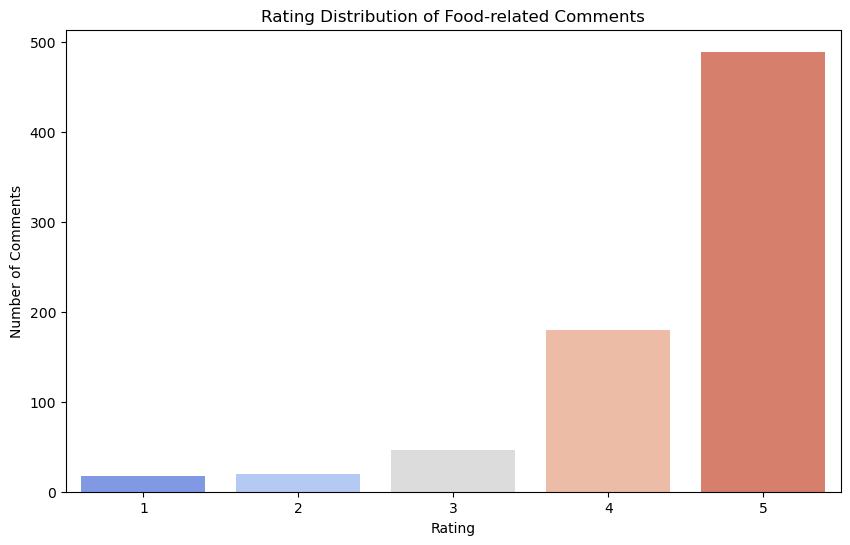

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

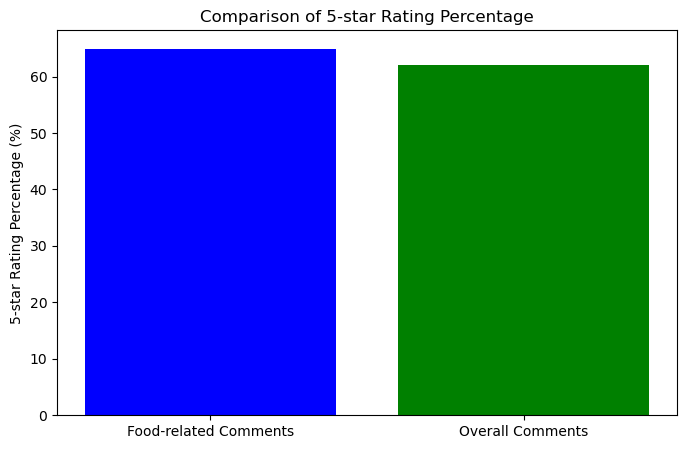

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the fo

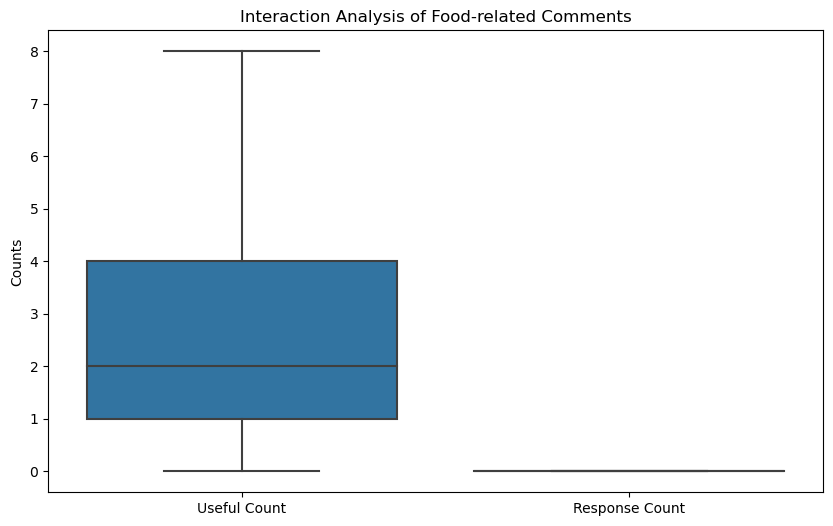

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'san

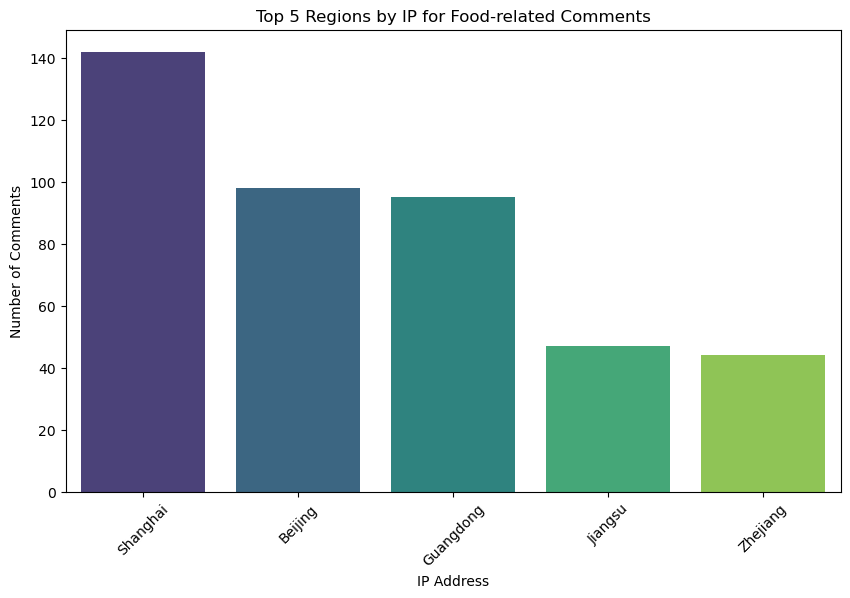

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from deep_translator import GoogleTranslator

# 读取Excel文件
file_path = 'Blossoms_DouBan_Review.xlsx'
df = pd.read_excel(file_path)

# 定义电视剧中提及的美食关键词库
drama_food_keywords = ['和平饭店', '至真园', '泡饭', '排骨年糕', '青鱼秃肺拼海参', '红烧划水', '定胜糕', '油墩', 
                        '川沙鸡爪', '牛河', '黄鱼面', '粢饭团', '仙鹤神针', '船王炒饭', '火焰大王蛇', 
                        '三文鱼', '鲇鱼', '茶叶蛋', '火锅', '辣肉面', '宝总套餐']

# 只保留包含美食关键词的评论
df['food_related'] = df['内容'].apply(lambda x: any(kw in str(x) for kw in drama_food_keywords))
food_related_comments = df[df['food_related']]

# 分析1: 美食相关评论的星级分布与五星评价对比
plt.figure(figsize=(10, 6))
sns.countplot(data=food_related_comments, x='星级', palette='coolwarm')
plt.title('Rating Distribution of Food-related Comments')
plt.xlabel('Rating')
plt.ylabel('Number of Comments')
plt.show()

# 计算五星评价比例
food_related_five_star = food_related_comments[food_related_comments['星级'] == 5]
overall_five_star = df[df['星级'] == 5]
food_five_star_rate = len(food_related_five_star) / len(food_related_comments) * 100
overall_five_star_rate = len(overall_five_star) / len(df) * 100

# 画出五星评价对比图
plt.figure(figsize=(8, 5))
plt.bar(['Food-related Comments', 'Overall Comments'], [food_five_star_rate, overall_five_star_rate], color=['blue', 'green'])
plt.title('Comparison of 5-star Rating Percentage')
plt.ylabel('5-star Rating Percentage (%)')
plt.show()

# 分析2: 美食相关评论的互动性分析（有用数、回应数）
# 替换列名为英文
food_related_comments = food_related_comments.rename(columns={'有用数': 'Useful Count', '回应数': 'Response Count'})

plt.figure(figsize=(10, 6))
sns.boxplot(data=food_related_comments[['Useful Count', 'Response Count']], showfliers=False)  # 去掉极端值
plt.title('Interaction Analysis of Food-related Comments')
plt.ylabel('Counts')
plt.show()

# 分析3: 美食相关评论的地域分布
ip_counts = food_related_comments['IP'].value_counts().head(5)  # 只展示前五个地区

# 翻译IP地址
ip_counts.index = [GoogleTranslator(source='zh-CN', target='en').translate(ip) for ip in ip_counts.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=ip_counts.index, y=ip_counts.values, palette='viridis')
plt.title('Top 5 Regions by IP for Food-related Comments')
plt.xlabel('IP Address')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#计算这部剧的平均分
#计算美食相关的评论的平均分
#计算美食相关评论的平均文字长度
#计算评论的平均长度
#计算与美食评论相关的星级分布

In [12]:
# 计算平均评分
average_rating = df['星级'].mean()
print(f'The average rating of the show is: {average_rating:.2f}')

The average rating of the show is: 4.29


In [13]:
# 计算美食相关评论的平均分
average_food_rating = food_related_comments['星级'].mean()
average_food_rating


4.46347941567065

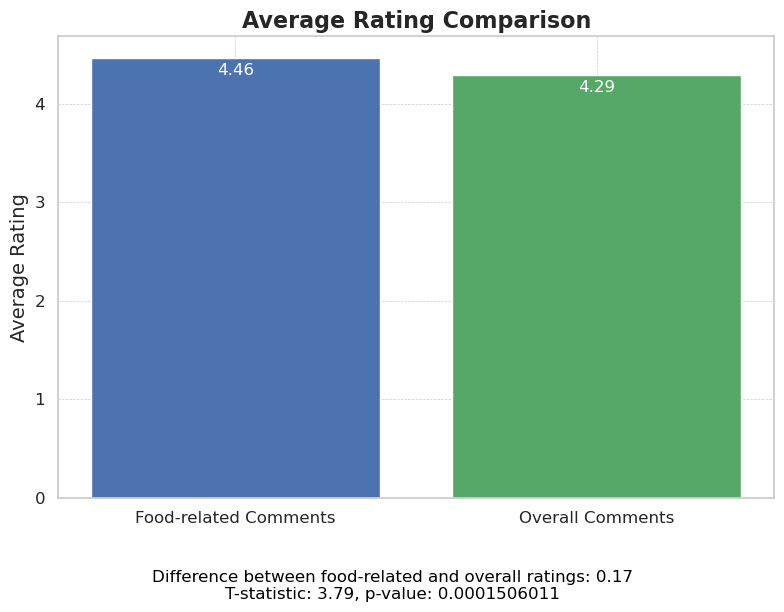

In [23]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# 计算平均分差异
diff = average_food_rating - average_rating

# 设置图表风格
sns.set(style="whitegrid")

# 可视化对比
plt.figure(figsize=(8, 6))
bars = plt.bar(['Food-related Comments', 'Overall Comments'], [average_food_rating, average_rating], color=['#4c72b0', '#55a868'])

# 添加数值标签
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.2, f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=12, color='white')

# 添加图表标题和轴标签
plt.title('Average Rating Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 显示网格线
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 统计检验 (t 检验)
t_stat, p_val = stats.ttest_ind(food_related_comments['星级'], df['星级'])

# 显示更精确的 p-value
annotation_text = f'Difference between food-related and overall ratings: {diff:.2f}\nT-statistic: {t_stat:.2f}, p-value: {p_val:.10f}'
plt.text(0.5, 0.01, annotation_text, ha='center', va='center', fontsize=12, color='black', transform=plt.gcf().transFigure)

plt.savefig('average_rating_comparison.png', dpi=300, bbox_inches='tight')


# 展示图表
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

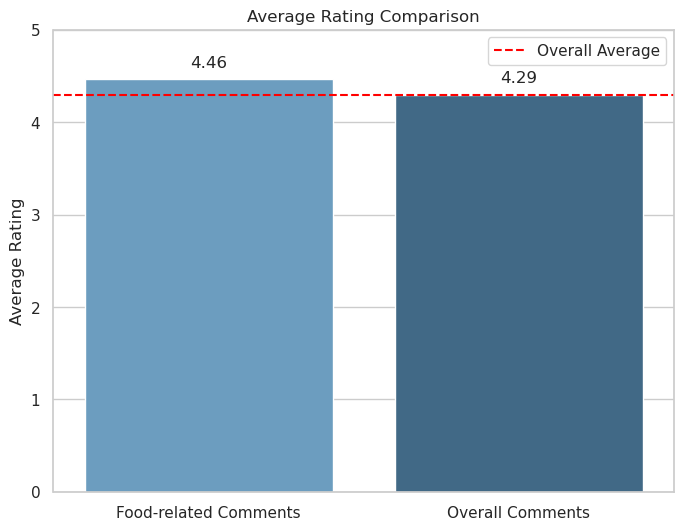

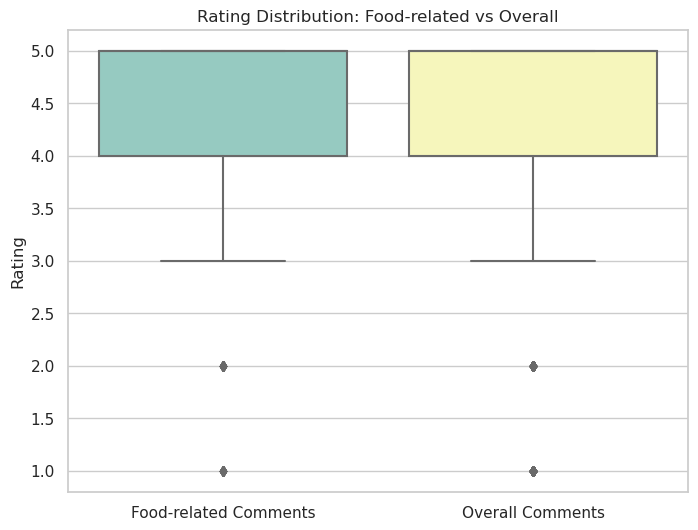

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_17460/2836930823.py:49: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=monthly_avg_rating, marker='o', palette='coolwarm')
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldc

TypeError: Invalid object type at position 0

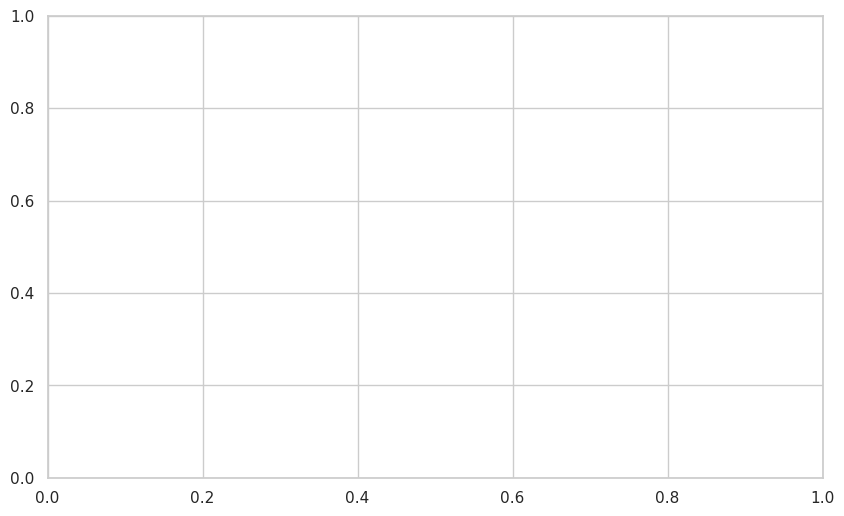

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 使用 seaborn 主题
sns.set_theme(style="whitegrid")

# 读取Excel文件
file_path = 'Blossoms_DouBan_Review.xlsx'
df = pd.read_excel(file_path)

# 定义美食关键词
drama_food_keywords = ['和平饭店', '至真园', '泡饭', '排骨年糕', '青鱼秃肺拼海参', '红烧划水', '定胜糕', '油墩', 
                        '川沙鸡爪', '牛河', '黄鱼面', '粢饭团', '仙鹤神针', '船王炒饭', '火焰大王蛇', 
                        '三文鱼', '鲇鱼', '茶叶蛋', '火锅', '辣肉面', '宝总套餐']

# 过滤出美食相关的评论
df['food_related'] = df['内容'].apply(lambda x: any(kw in str(x) for kw in drama_food_keywords))
food_related_comments = df[df['food_related']]

# 1. 美食相关评论与整体评论的评分对比
plt.figure(figsize=(8, 6))
sns.barplot(x=['Food-related Comments', 'Overall Comments'], y=[average_food_rating, average_rating], palette='Blues_d')
plt.title('Average Rating Comparison')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.text(0, average_food_rating + 0.1, f'{average_food_rating:.2f}', ha='center', va='bottom', fontsize=12)
plt.text(1, average_rating + 0.1, f'{average_rating:.2f}', ha='center', va='bottom', fontsize=12)
plt.axhline(average_rating, color='red', linestyle='--', label='Overall Average')
plt.legend()
plt.show()

# 2. 美食相关评论的评分分布箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(data=[food_related_comments['星级'], df['星级']], palette='Set3')
plt.title('Rating Distribution: Food-related vs Overall')
plt.xticks([0, 1], ['Food-related Comments', 'Overall Comments'])
plt.ylabel('Rating')
plt.show()

# 3. 美食相关评论的时间趋势分析（假设有时间数据）
# 如果数据有时间戳，可以按月或季度计算平均评分或评论数量
df['date'] = pd.to_datetime(df['时间'])
df.set_index('date', inplace=True)
df['month'] = df.index.to_period('M')
monthly_avg_rating = df.groupby('month')['星级'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg_rating, marker='o', palette='coolwarm')
plt.title('Monthly Average Rating Trend')
plt.ylabel('Average Rating')
plt.show()

# 4. 热力图：美食相关评论的地区分布热力图（假设有地域细分数据）
ip_counts = food_related_comments['IP'].value_counts()
plt.figure(figsize=(12, 8))
sns.heatmap(ip_counts.values.reshape(5, 2), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top Regions by IP for Food-related Comments')
plt.show()
